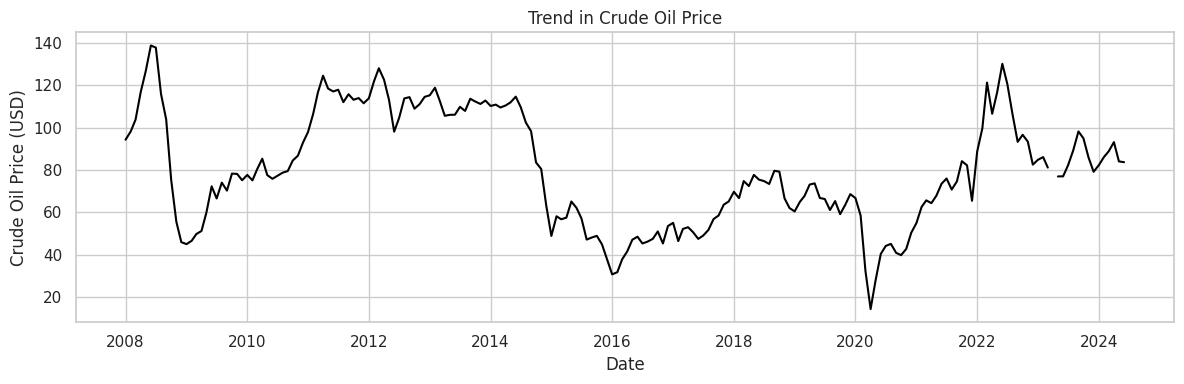

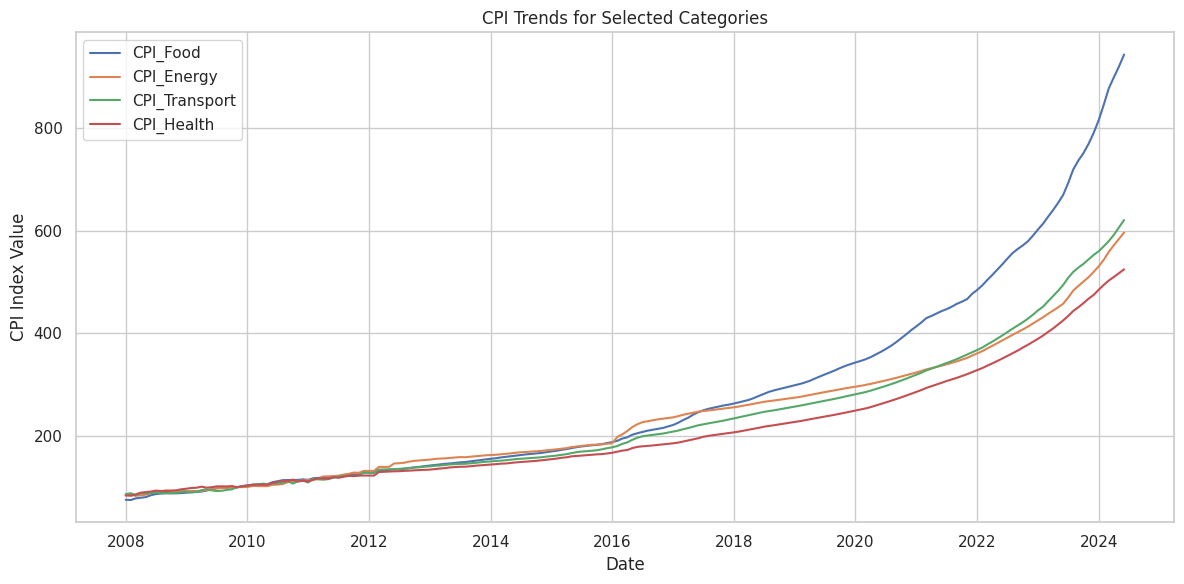

                            OLS Regression Results                            
Dep. Variable:              CPI_Value   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     33.68
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.89e-21
Time:                        01:27:30   Log-Likelihood:                -7446.9
No. Observations:                1188   AIC:                         1.490e+04
Df Residuals:                    1184   BIC:                         1.492e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 83

In [6]:
# === 1. Import Required Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# === 2. Load and Prepare the Dataset ===
df = pd.read_csv("NigeriaInflationRates.csv")

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# === 3. Plot fuel price trend
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Crude Oil Price'], color='black')
plt.title('Trend in Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price (USD)')
plt.tight_layout()
plt.show()

# Plot selected CPI categories (food, transport, health)
plt.figure(figsize=(12, 6))
for col in ['CPI_Food', 'CPI_Energy', 'CPI_Transport', 'CPI_Health']:
    plt.plot(df['Date'], df[col], label=col)

plt.title('CPI Trends for Selected Categories')
plt.xlabel('Date')
plt.ylabel('CPI Index Value')
plt.legend()
plt.tight_layout()
plt.show()

# === 4. Transform Data for DiD Regression ===
# Melt the dataframe so all CPI values are in a single column
cpi_cols = ['CPI_Food', 'CPI_Energy', 'CPI_Transport', 'CPI_Health', 'CPI_Communication', 'CPI_Education']
df_long = df.melt(id_vars=['Date', 'Crude Oil Price'], value_vars=cpi_cols,
                  var_name='CPI_Category', value_name='CPI_Value')

# Define treated vs control groups
treated_categories = ['CPI_Food', 'CPI_Energy', 'CPI_Transport']
df_long['treated'] = df_long['CPI_Category'].isin(treated_categories).astype(int)

# Define post-treatment period (after June 2008)
df_long['post_treatment'] = (df_long['Date'] >= '2008-06-01').astype(int)

# === 5. Run DiD Regression ===
model = smf.ols('CPI_Value ~ treated * post_treatment', data=df_long).fit()
print(model.summary())
